In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer
)
import sys
sys.path.append('./input/preprocessors.py')
from input.preprocessors import LogTransformation, Scaler

In [4]:
data = pd.read_csv("../data/raw/full_train.csv")
data

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
144,Jul-17,293.04,372.00,290.78,361.96
145,Aug-17,363.00,368.52,337.37,351.15
146,Sep-17,351.00,383.25,345.50,350.00
147,Oct-17,354.60,375.75,299.00,314.35


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Date', 'Close'], axis=1),
    data['Close'],
    test_size=0.2,
    random_state=0,
)

In [6]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [7]:
NUMERICAL_VARS = ['Open', 'High', 'Low']

In [8]:
full_machine_learning_pipeline = Pipeline([
    
    ('missing_indicator', AddMissingIndicator(variables = NUMERICAL_VARS)),

    ('mean_imputation', MeanMedianImputer(
        imputation_method='mean', variables = NUMERICAL_VARS)),

    ('log', LogTransformation(variables=NUMERICAL_VARS)),

    ('scale', Scaler(variables = NUMERICAL_VARS)),

    ('model', DecisionTreeRegressor(max_depth = 7, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5))

])

In [9]:
full_machine_learning_pipeline.fit(X_train, y_train)

Pipeline(steps=[('missing_indicator',
                 AddMissingIndicator(variables=['Open', 'High', 'Low'])),
                ('mean_imputation',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Open', 'High', 'Low'])),
                ('log', LogTransformation(variables=['Open', 'High', 'Low'])),
                ('scale', Scaler(variables=['Open', 'High', 'Low'])),
                ('model',
                 DecisionTreeRegressor(max_depth=7, max_features='sqrt',
                                       min_samples_leaf=2,
                                       min_samples_split=5))])

In [10]:
predictions = full_machine_learning_pipeline.predict(X_test)

model_mse = mean_squared_error(y_test, predictions)
print("MSE en conjunto de prueba para el modelo DecisionTreeRegressor:", model_mse)

MSE en conjunto de prueba para el modelo DecisionTreeRegressor: 0.011182218853371478


In [11]:
joblib.dump(full_machine_learning_pipeline, '../src/full_ml_pipeline.joblib')

['../src/full_ml_pipeline.joblib']

# DATOS NUNCA VISTOS (final_test.csv)

In [12]:
data = pd.read_csv("../data/raw/final_test.csv")
y_real = data["Close"]
data.drop(columns = ['Date','Close'], inplace=True)

In [13]:
nuevas_pred = full_machine_learning_pipeline.predict(data)

In [14]:
nuevas_pred

array([5.83943022, 5.79896243, 5.79896243, 5.65967999, 5.83943022,
       5.79896243, 5.79896243, 5.79896243, 5.79896243, 5.65967999,
       5.2850425 , 5.2850425 , 5.2850425 , 5.2850425 , 5.2850425 ,
       5.65967999, 5.65967999, 4.9531895 , 4.9720269 , 4.69517802,
       4.29046886, 4.27261518, 3.48906806, 4.23233875, 4.23233875,
       3.66981001, 3.66981001, 3.48906806, 3.23019004, 3.36770829,
       3.36770829, 3.1562035 , 2.55221771, 2.60362411, 2.55221771,
       2.55221771])

<Axes: >

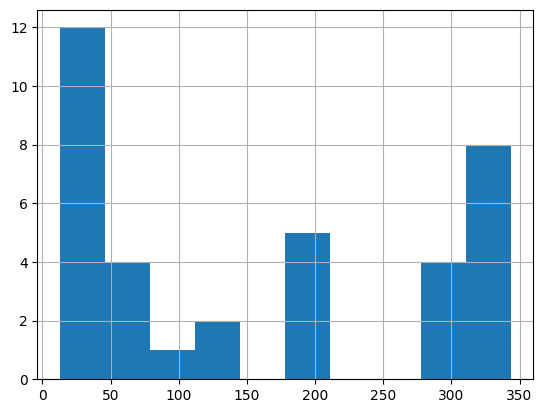

In [15]:
pd.Series(np.exp(nuevas_pred)).hist(bins=10)

<Axes: >

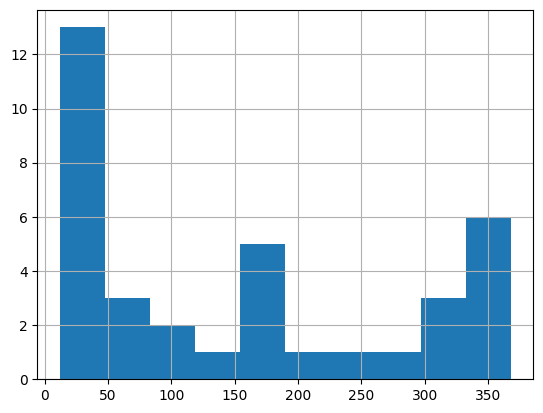

In [16]:
pd.Series(y_real).hist(bins=10)